In [2]:
import torch 

import matplotlib.pyplot as plt

In [232]:
x = torch.linspace(0, 5, 1000)
y = torch.distributions.Normal(torch.sin(2*x-1) + 0.5*x-1, 0.1)
ys = torch.linspace(-2, 2, 1000)

Z = y.log_prob(ys.repeat(1000,1).T).exp()

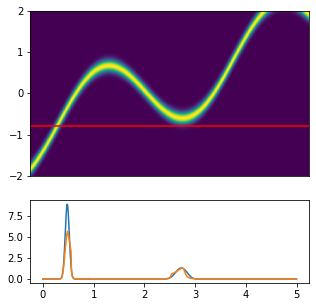

In [254]:
fig, axes = plt.subplots(2,1, figsize=(5,5),gridspec_kw={'height_ratios': [2,1], "width_ratios": [1]})
index = 300

axes[0].pcolormesh(x, ys, Z)
axes[0].plot(x, torch.ones(1000)*ys[index], color="red")
axes[0].set_xticks([])
axes[1].plot(x,Z[index]/torch.trapz(Z[index], ys))
axes[1].plot(x, net(ys[index].reshape(-1,1)).log_prob(x.reshape(-1,1)).exp().detach().flatten())
fig.savefig("misspecification_nonrob_net_proper_gen_model2.png")

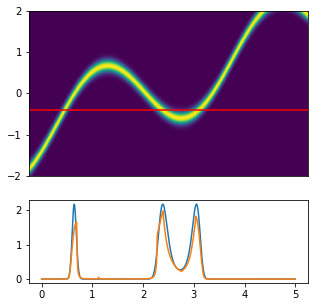

In [253]:
fig, axes = plt.subplots(2,1, figsize=(5,5),gridspec_kw={'height_ratios': [2,1], "width_ratios": [1]})
index = 400

axes[0].pcolormesh(x, ys, Z)
axes[0].plot(x, torch.ones(1000)*ys[index], color="red")
axes[0].set_xticks([])
axes[1].plot(x,Z[index]/torch.trapz(Z[index], ys))
axes[1].plot(x, net(ys[index].reshape(-1,1)).log_prob(x.reshape(-1,1)).exp().detach().flatten())
fig.savefig("misspecification_nonrob_net_proper_gen_model.png")

In [235]:
from rbi.utils.nets import SplineAutoregressiveModel
from rbi.loss.loss_fn import NLLLoss

net = SplineAutoregressiveModel(1,1, num_transforms=2, count_bins=20, bound=5)
loss_fn = NLLLoss(net)
optim = torch.optim.Adam(net.parameters())

c:\ProgramData\Miniconda3\lib\site-packages\pyro\nn\auto_reg_nn.py:179: UserWarning: ConditionalAutoRegressiveNN input_dim = 1. Consider using an affine transformation instead.
  warnings.warn(


In [240]:
for i in range(1000):
    optim.zero_grad()
    loss = loss_fn(y.sample().reshape(-1,1), x.reshape(-1,1))
    loss.backward()
    optim.step()
    print(loss)

tensor([-0.4360], grad_fn=<AddBackward0>)
tensor([-0.4067], grad_fn=<AddBackward0>)
tensor([-0.4352], grad_fn=<AddBackward0>)
tensor([-0.4576], grad_fn=<AddBackward0>)
tensor([-0.4447], grad_fn=<AddBackward0>)
tensor([-0.4040], grad_fn=<AddBackward0>)
tensor([-0.4193], grad_fn=<AddBackward0>)
tensor([-0.4709], grad_fn=<AddBackward0>)
tensor([-0.4405], grad_fn=<AddBackward0>)
tensor([-0.4322], grad_fn=<AddBackward0>)
tensor([-0.4276], grad_fn=<AddBackward0>)
tensor([-0.4168], grad_fn=<AddBackward0>)
tensor([-0.4372], grad_fn=<AddBackward0>)
tensor([-0.4238], grad_fn=<AddBackward0>)
tensor([-0.4024], grad_fn=<AddBackward0>)
tensor([-0.4134], grad_fn=<AddBackward0>)
tensor([-0.4270], grad_fn=<AddBackward0>)
tensor([-0.4335], grad_fn=<AddBackward0>)
tensor([-0.4105], grad_fn=<AddBackward0>)
tensor([-0.4489], grad_fn=<AddBackward0>)
tensor([-0.4598], grad_fn=<AddBackward0>)
tensor([-0.4082], grad_fn=<AddBackward0>)
tensor([-0.4368], grad_fn=<AddBackward0>)
tensor([-0.4452], grad_fn=<AddBack

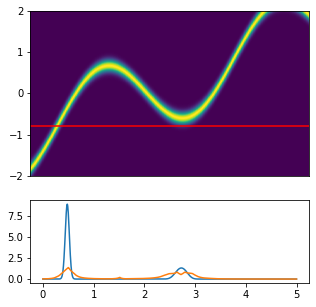

In [252]:
fig, axes = plt.subplots(2,1, figsize=(5,5),gridspec_kw={'height_ratios': [2,1], "width_ratios": [1]})
index = 300

axes[0].pcolormesh(x, ys, Z)
axes[0].plot(x, torch.ones(1000)*ys[index], color="red")
axes[0].set_xticks([])
axes[1].plot(x,Z[index]/torch.trapz(Z[index], ys))
axes[1].plot(x, net2(ys[index].reshape(-1,1)).log_prob(x.reshape(-1,1)).exp().detach().flatten())
fig.savefig("misspecification_rob_net_proper_gen_model2.png")

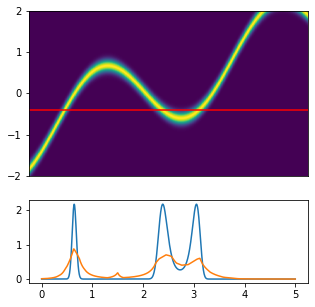

In [251]:
fig, axes = plt.subplots(2,1, figsize=(5,5),gridspec_kw={'height_ratios': [2,1], "width_ratios": [1]})
index = 400

axes[0].pcolormesh(x, ys, Z)
axes[0].plot(x, torch.ones(1000)*ys[index], color="red")
axes[0].set_xticks([])
axes[1].plot(x,Z[index]/torch.trapz(Z[index], ys))
axes[1].plot(x, net2(ys[index].reshape(-1,1)).log_prob(x.reshape(-1,1)).exp().detach().flatten())
fig.savefig("misspecification_rob_net_proper_gen_model.png")

In [263]:
from rbi.defenses.regularized_loss import GaussianNoiseJacobiRegularizer

net2 = SplineAutoregressiveModel(1,1, num_transforms=2, count_bins=20, bound=5)
loss_fn2 = NLLLoss(net2)
optim = torch.optim.Adam(net2.parameters())
defense = GaussianNoiseJacobiRegularizer(net2, loss_fn2, pertubation_scale=0.3, fisher_mc_samples=100)
defense.activate()

c:\ProgramData\Miniconda3\lib\site-packages\pyro\nn\auto_reg_nn.py:179: UserWarning: ConditionalAutoRegressiveNN input_dim = 1. Consider using an affine transformation instead.
  warnings.warn(


In [264]:
for i in range(1000):
    optim.zero_grad()
    loss = loss_fn2(y.sample().reshape(-1,1), x.reshape(-1,1))
    loss.backward()
    optim.step()
    print(loss)

tensor([5.2339], grad_fn=<AddBackward0>)
tensor([4.9497], grad_fn=<AddBackward0>)
tensor([4.6700], grad_fn=<AddBackward0>)
tensor([4.3896], grad_fn=<AddBackward0>)
tensor([4.1528], grad_fn=<AddBackward0>)
tensor([3.9170], grad_fn=<AddBackward0>)
tensor([3.7105], grad_fn=<AddBackward0>)
tensor([3.4991], grad_fn=<AddBackward0>)
tensor([3.2687], grad_fn=<AddBackward0>)
tensor([3.0235], grad_fn=<AddBackward0>)
tensor([2.7663], grad_fn=<AddBackward0>)
tensor([2.5896], grad_fn=<AddBackward0>)
tensor([2.4142], grad_fn=<AddBackward0>)
tensor([2.2658], grad_fn=<AddBackward0>)
tensor([2.1689], grad_fn=<AddBackward0>)
tensor([2.0413], grad_fn=<AddBackward0>)
tensor([1.9688], grad_fn=<AddBackward0>)
tensor([1.8865], grad_fn=<AddBackward0>)
tensor([1.7445], grad_fn=<AddBackward0>)
tensor([1.6770], grad_fn=<AddBackward0>)
tensor([1.5644], grad_fn=<AddBackward0>)
tensor([1.5578], grad_fn=<AddBackward0>)
tensor([1.4862], grad_fn=<AddBackward0>)
tensor([1.4390], grad_fn=<AddBackward0>)
tensor([1.4466],

KeyboardInterrupt: 

In [265]:
x = torch.linspace(0, 5, 1000)
y = torch.distributions.Normal(torch.sin(2*x-1) + 0.5*x-1, 0.4)
ys = torch.linspace(-2, 2, 1000)

Z = y.log_prob(ys.repeat(1000,1).T).exp()

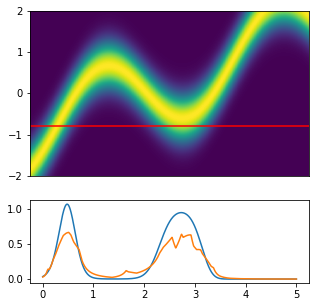

In [266]:
fig, axes = plt.subplots(2,1, figsize=(5,5),gridspec_kw={'height_ratios': [2,1], "width_ratios": [1]})
index = 300

axes[0].pcolormesh(x, ys, Z)
axes[0].plot(x, torch.ones(1000)*ys[index], color="red")
axes[0].set_xticks([])
axes[1].plot(x,Z[index]/torch.trapz(Z[index], ys))
axes[1].plot(x, net2(ys[index].reshape(-1,1)).log_prob(x.reshape(-1,1)).exp().detach().flatten())
fig.savefig("misspecification_rob_net_proper_robgen_model.png")

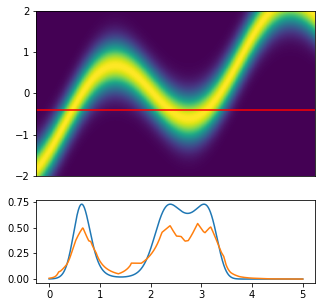

In [267]:
fig, axes = plt.subplots(2,1, figsize=(5,5),gridspec_kw={'height_ratios': [2,1], "width_ratios": [1]})
index = 400

axes[0].pcolormesh(x, ys, Z)
axes[0].plot(x, torch.ones(1000)*ys[index], color="red")
axes[0].set_xticks([])
axes[1].plot(x,Z[index]/torch.trapz(Z[index], ys))
axes[1].plot(x, net2(ys[index].reshape(-1,1)).log_prob(x.reshape(-1,1)).exp().detach().flatten())
fig.savefig("misspecification_rob_net_proper_robgen_model2.png")